In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from seaborn import heatmap 

In [18]:
(train,val,test) =tfds.load(name= 'ColorectalHistology',split=['train[:80%]','train[80%:90%]','train[90%:]'])

train

<PrefetchDataset shapes: {filename: (), image: (150, 150, 3), label: ()}, types: {filename: tf.string, image: tf.uint8, label: tf.int64}>

In [16]:
dataset = tfds.builder('ColorectalHistology')
info = dataset.info
datapoint=next(iter(train))
class_names=[]
for i in range(info.features['label'].num_classes):
  class_names.append(info.features['label'].int2str(i))
class_names

['tumor',
 'stroma',
 'complex',
 'lympho',
 'debris',
 'mucosa',
 'adipose',
 'empty']

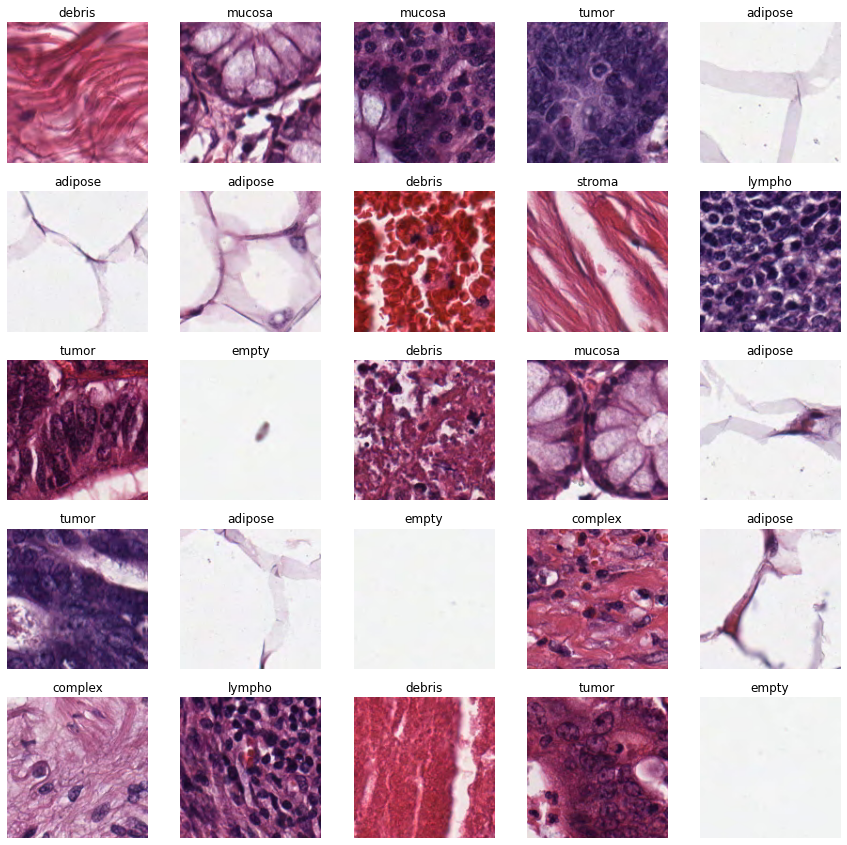

In [17]:
plt.figure(figsize=(15,15))
for i, datapoint in enumerate(tfds.as_numpy(train.take((25)))):
  ax =plt.subplot(5,5,i+1)
  plt.imshow(datapoint["image"])
  plt.title(class_names[datapoint['label']])
  plt.axis('off')
plt.show()    

In [19]:
@tf.function
def prepare_training_data(datapoint):
  input_image=tf.image.resize(datapoint['image'],IMAGE_SHAPE)

  return input_image,datapoint['label']

def prepare_validation_data(datapoint):
  input_image=tf.image.resize(datapoint['image'],IMAGE_SHAPE)
  return input_image,datapoint['label']


In [20]:
@tf.function
def prepare_training_dataa(datapoint):
  input_image=tf.image.resize(datapoint['image'],IMAGE_SHAPE)

  if tf.random.uniform(()) > 0.5:
    input_image=tf.image.random_flip_left_right(input_image)
    input_image=tf.image.random_flip_up_down(input_image)
    input_image=tf.image.random_brightness(imput_image,max_delta=0.3)
 

In [ ]:
train = train.map(prepare_training_data,num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation = val.map(prepare_training_data)
train_dataset=train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset=train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset=validation.batch(BATCH_SIZE)
